In [1]:
from google.colab import drive
drive.mount('/content/grive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grive


In [2]:
# just to use 50% of My GPU memoary
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# importing all necessary library
from tensorflow.keras.layers import Dense,Flatten,Lambda,Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as pl

In [6]:
# fix the image size and load dataset
IMAGE_SIZE=[224,224]

train_path='/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train'
test_path='/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test'

In [8]:
# import the resnet as below shown and preprocess frontend for resnet

resnet=ResNet152V2(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 3s 0us/step


In [9]:
# Just to train last layer
for layer in resnet.layers:
  layer.trainable=False

In [10]:
# Checking the output class
from glob import glob
Folder=glob('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/*')
Folder

['/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/diseased cotton leaf',
 '/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/fresh cotton leaf',
 '/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/diseased cotton plant',
 '/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/fresh cotton plant']

In [11]:
# Our layer
x=Flatten()(resnet.output)

In [12]:
prediction = Dense(len(Folder),activation='softmax')(x)

In [13]:
# Creating the model
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:
# Compile the mmodel
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
# loading The datset through Imagedatagenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
training_set=train_datagen.flow_from_directory('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set=test_datagen.flow_from_directory('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 18 images belonging to 4 classes.


In [18]:
# fit the model
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      validation_steps=len(test_set),
                      steps_per_epoch=len(training_set),
                      epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 471s 8s/step - loss: 1.2695 - accuracy: 0.8329 - val_loss: 1.1210 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 37s 614ms/step - loss: 0.7108 - accuracy: 0.9062 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 38s 616ms/step - loss: 0.3552 - accuracy: 0.9508 - val_loss: 0.5301 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 38s 617ms/step - loss: 0.3177 - accuracy: 0.9539 - val_loss: 0.3498 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 38s 619ms/step - loss: 0.3921 - accuracy: 0.9534 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 38s 617ms/step - loss: 0.1936 - accuracy: 0.9749 - val_loss: 1.8675 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 38s 625ms/step -

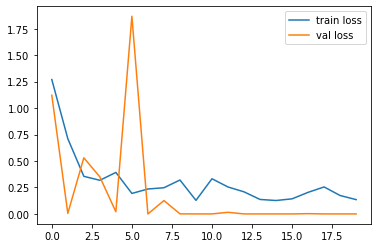

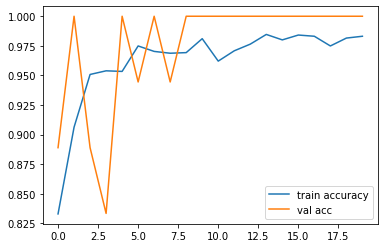

<Figure size 432x288 with 0 Axes>

In [20]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/grive/My Drive/Colab Notebooks/Cotton Disease/LossVal_loss')

# plot accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/grive/My Drive/Colab Notebooks/Cotton Disease/AccVal_acc')

In [21]:
# save file as h5 format

model.save('/content/grive/My Drive/Colab Notebooks/Cotton Disease/model_resnet50.h5')

In [22]:
prediction=model.predict(test_set)
prediction

array([[5.75643049e-13, 1.00000000e+00, 8.29966570e-29, 1.77389735e-19],
       [4.32242904e-15, 1.06471561e-19, 1.22040635e-31, 1.00000000e+00],
       [2.63729504e-29, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.36467223e-11, 0.00000000e+00, 1.00000000e+00, 5.62552053e-31],
       [5.19736876e-09, 1.87167018e-11, 1.75072684e-13, 1.00000000e+00],
       [5.57574249e-38, 4.88545794e-20, 0.00000000e+00, 1.00000000e+00],
       [1.10721805e-26, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.88328188e-23, 1.00000000e+00, 1.79660876e-27, 3.31423372e-16],
       [0.00000000e+00, 8.94841286e-35, 0.00000000e+00, 1.00000000e+00],
       [2.67055493e-19, 3.06542925e-19, 1.00000000e+00, 5.76061761e-16],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.56184958e-35, 6.61727405e-21, 3.56334343e-21, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.46856247e-18, 1.05439919e-22, 1.00000000e

In [23]:
predictions=np.argmax(prediction,axis=1)
predictions

array([1, 3, 2, 2, 3, 3, 2, 1, 3, 2, 1, 3, 1, 2, 0, 0, 0, 1])

In [24]:
# Now load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/grive/My Drive/Colab Notebooks/Cotton Disease/model_resnet50.h5')

In [25]:
img=image.load_img('/content/grive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test/fresh cotton plant/dsd (223).jpg',
                   target_size=(224,224))

In [26]:
x=image.img_to_array(img)
x

array([[[ 57., 138.,  18.],
        [ 55., 136.,  16.],
        [ 69., 142.,  25.],
        ...,
        [100., 158.,  81.],
        [106., 160.,  76.],
        [101., 155.,  77.]],

       [[ 69., 144.,  15.],
        [ 74., 150.,  28.],
        [ 64., 138.,  17.],
        ...,
        [143., 188.,  83.],
        [172., 199.,  84.],
        [107., 152.,  69.]],

       [[ 64., 139.,  10.],
        [ 51., 128.,   0.],
        [ 92., 167.,  40.],
        ...,
        [144., 185.,  57.],
        [130., 176.,  67.],
        [ 96., 149.,  57.]],

       ...,

       [[ 60.,  53.,  35.],
        [ 66.,  57.,  42.],
        [ 55.,  46.,  29.],
        ...,
        [ 70., 117.,  49.],
        [ 72., 122.,  49.],
        [ 76., 128.,  54.]],

       [[ 67.,  60.,  42.],
        [ 69.,  62.,  44.],
        [ 87.,  78.,  61.],
        ...,
        [ 77., 127.,  58.],
        [ 82., 132.,  61.],
        [ 74., 126.,  54.]],

       [[ 63.,  56.,  38.],
        [ 76.,  69.,  51.],
        [ 78.,  

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[5.1963103e-01, 7.4580404e-11, 1.3663477e-04, 4.8023239e-01]],
      dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data),axis=1)
a

array([0])

In [32]:
a==1

array([False])

In [33]:
a==0

array([ True])

In [34]:
a==2

array([False])